This is the plotting file for nproc 2851, 2852 and the corresponding distribution scaling for nlo $gg\to\gamma\gamma$. This uses the sherpa configuration and a binning scheme choses to emualate the one in use for $gg\to\gamma\gamma j$ i.e nproc 2861

In [35]:


import importlib
import dataset 
import ROOT 

import compare 
import utils

importlib.reload(dataset)
importlib.reload(utils)
importlib.reload(compare)


<module 'compare' from '/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/compare.py'>

In [2]:
base_path = "/Users/jorgehernandez/Desktop/pp-gammagamma" 



In [40]:
gmgm_raw = ["gg2gam_lo_5q_sherpa_autoplotHists" , "gg2gam_nlo_5q_sherpa_autoplotHists" , "gg2gam_lo_6q_sherpa_autoplotHists"]
gmgm_raw_lo = ["gg2gam_lo_5q_sherpa_autoplotHists" , "gg2gam_lo_6q_sherpa_autoplotHists"] 
gmgm_raw_nlo = ["gg2gam_nlo_5q_sherpa_autoplotHists"] 

variables = ["m34_highMass" , "m(34)" , "pt(3)" , "pt(4)", "y(3)" ,"y(4)" ]

for var in variables: 
    gmgm = [dataset.Dataset.from_directory( name=dir,  var=var , directory= f"{base_path}/{dir}") for dir in gmgm_raw ] 
#    print(f"var is: {var}")
#    print(f"dataset vars: {gmgm[0].var} , {gmgm[1].var } , {gmgm[2].var}  ")
    
    comp_ = compare.Compare(gmgm , name = "gg2gmgm_sherpaConfig_autoplotBinning")
    # scale according to scheme 1, established previouslt in notes and frank petriello correspondence. 
    #comp_.datasets[1] = gg2gam_nlo_5q_sherpa_autoplotHists and comp_.datasets[0] = gg2gam_lo_5q_sherpa_autoplotHists
    comp_.plot(labels=[r"$gg \to \gamma \gamma (LO/n_f=5)$" , r"$gg \to \gamma \gamma (NL0/n_f=5)$" ,  r"$gg \to \gamma \gamma g (LO/n_f=6)$"], logy=True)

    comp_.create_kfactor(num_dataset= comp_.datasets[2], denom_dataset= comp_.datasets[0] , name = "gg2gmgm_kfactors" , new_y_axis_name=f"d#sigma(n_{{f}} = 5)/d#sigma(n_{{f}} = 6)") # numerator is gg2gam_nlo_5q_sherpa_autoplotHists and denom is gg2gam_lo_5q_sherpa_autoplotHists

    comp_.scale_histogram(comp_.datasets[1], name = "gg2gam_nlo_6q_sherpa_autoplotHists")
    
#    print(comp_.datasets[3].hist) 
    comp_.datasets[3].save_as_TH1F(f"gg2gmgm_nlo_6q_sherpaConfig_autoplotBinning_{var}") 

    comp_.plot(logy= True, output_dir="plots/gg2gmgm_nlo_6q_5q_comparisons_sherpaConfig_autoplotBinning", labels = [r" NL0 $gg \to \gamma \gamma$ (5q)" , r" NL0 $gg \to \gamma \gamma$ (6q)" ], sel = [0 ,1 ,0 , 1]) 





Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_sherpa_autoplotHists' to comparison (4 total).


Info in <TCanvas::Print>: pdf file plots/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_sherpaConfig_autoplotBinning/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_sherpaConfig_autoplotBinning/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_sherpaConfig_autoplotBinning/gg2gmgm_sherpaConfig_autoplotBinning/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: p

In [87]:
#checking to see the kfactor plots

var1  = "m34_highMass"
path  = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors"
filename = f"/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors/kfactor_{var1}.root"

#rootFile = ROOT.TFile.Open(f"{path}/{filename}", "READ")

#histogram = rootFile.Get("histogram_name")  # Replace with your histogram's name




In [88]:

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()


TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors;1	


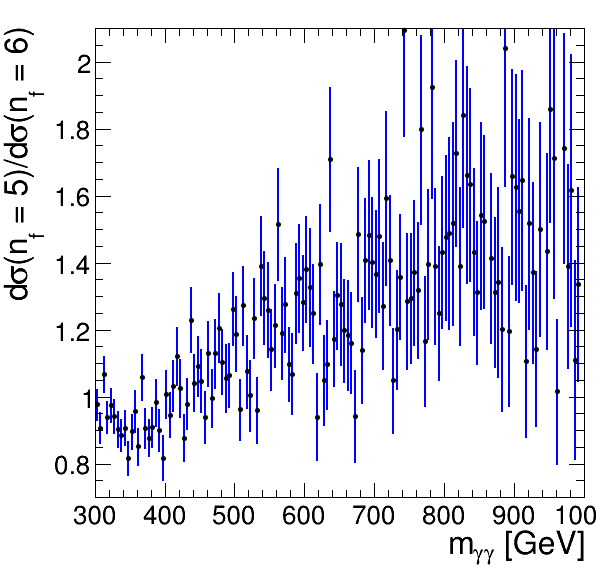

Info in <TCanvas::Print>: png file histogram.png has been created


In [90]:

ROOT.gROOT.SetBatch(True)
# Open the ROOT file
rootFile = ROOT.TFile.Open(filename, "READ")

# Get the histogram
my_histogram = rootFile.Get("gg2gmgm_kfactors")  

# Create a canvas
#canvas = ROOT.TCanvas("my_canvas", "My Histogram Plot", 800, 600)
c = ROOT.TCanvas()

# Draw the histogram

yaxis = my_histogram.GetYaxis()
yaxis.SetRangeUser(0.7, 2.1)   # y_min, y_max
my_histogram.Draw()
c.Draw()

# Convert to image and display inline
from IPython.display import Image, display
c.Update()
c.SaveAs("histogram.png")   # temporarily save as PNG
display(Image(filename="histogram.png"))

Checking the results for setting precision goal = 0.01 in the integreation section of the config file for 6q lo. The default, which is what we're comparing to and the one with the plots above, is with a precision goal = 0.05 


In [36]:
#6q lo for precision goal 1. 

base_path = "/Users/jorgehernandez/Desktop/pp-gammagamma" 

precisiongoal_01 = "6q_precgoal_01"  
precisiongoal_05  = "gg2gam_lo_6q_sherpa_autoplotHists"
itercallmult2 = "6q_itercallmult2_tst" 


variables = ["m34_highMass" , "m(34)" , "pt(3)" , "pt(4)", "y(3)" ,"y(4)" ]


for var in variables: 
    
#    gmgm_prec01 = [dataset.Dataset.from_directory( name=f"pg01_{var}",  var=var , directory= f"{base_path}/{precisiongoal_01}")] 
    gmgm_prec05 = [dataset.Dataset.from_directory( name=f"pg05_{var}",  var=var , directory= f"{base_path}/{precisiongoal_05}")] 
    gmgm_itercallmult2 = [dataset.Dataset.from_directory( name=f"itercallmult2_{var}",  var=var , directory= f"{base_path}/{itercallmult2}")]
    gmgm_precgoal01 = [dataset.Dataset.from_directory( name=f"pg01_{var}",  var=var , directory= f"{base_path}/{precisiongoal_01}")]

    combined_gmgm_precTest = gmgm_prec05 + gmgm_precgoal01
    combined_gmgm_itercall_default = gmgm_prec05 + gmgm_itercallmult2
    

    comp_ = compare.Compare(combined_gmgm_precTest , name = "gg2gmgm_precGoal_01_05_testing")

    #comp_.create_kfactor(num_dataset= comp_.datasets[0], denom_dataset= comp_.datasets[1] , name = "precisionGoal_Testing" , new_y_axis_name=f"run1/run2") 
    
    comp_.plot(labels=[r"$gg \to \gamma \gamma (precgoal=0.05)$" , r"$gg \to \gamma \gamma (precgoal=0.01)$"], logy=True)
    
    comp2_= compare.Compare(combined_gmgm_itercall_default , name = "gg2gmgm_itercallmult2_default_comp")
    comp2_.plot(labels=[r"$gg \to \gamma \gamma (precgoal=0.05)$" , r"$gg \to \gamma \gamma (itercallmult=2)$"], logy=True)

    #c=gmgm_prec01[0].plot()

    #c.Draw()    

    #c2=gmgm_prec05[0].plot()
    #c2.Draw()




Info in <TCanvas::Print>: pdf file plots/gg2gmgm_precGoal_01_05_testing/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_precGoal_01_05_testing/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_precGoal_01_05_testing/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_precGoal_01_05_testing/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_itercallmult2_default_comp/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_itercallmult2_default_comp/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_itercallmult2_default_comp/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_itercallmult2_default_comp/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_precGoal_01_05_testing/m(34).pdf has been created
Info in <TCanvas::Pri

In [5]:
#check the ratio plots created to see if there is any changes to the cross section values, it kinda looks like chaning precision goal did nothing. 


filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/precisionGoal_Testing/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()

TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/precisionGoal_Testing/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/precisionGoal_Testing/kfactor_m34_highMass.root	
  KEY: TH1F	precisionGoal_Testing;1	


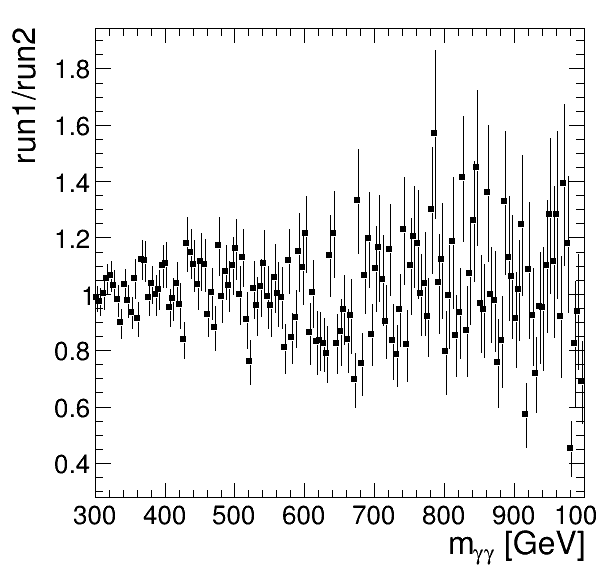

Info in <TCanvas::Print>: png file histogram.png has been created


In [16]:

ROOT.gROOT.SetBatch(True)
# Open the ROOT file
rootFile = ROOT.TFile.Open(filename, "READ")

# Get the histogram
my_histogram = rootFile.Get("precisionGoal_Testing")  

# Create a canvas
#canvas = ROOT.TCanvas("my_canvas", "My Histogram Plot", 800, 600)
c = ROOT.TCanvas()

# Draw the histogram
my_histogram.SetMarkerSize(0.8)
my_histogram.SetMarkerStyle(21)
my_histogram.Draw()
c.Draw()

# Convert to image and display inline
from IPython.display import Image, display
c.Update()
c.SaveAs("histogram.png")   # temporarily save as PNG
display(Image(filename="histogram.png"))

In [ ]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/precisionGoal_Testing/kfactor_m34_highMass.root"



In [61]:
#Same 6q gg to gamma gamma NLO estimation prescription but for data calculated with precision goal 0.1


base_path = "/Users/jorgehernandez/Desktop/pp-gammagamma" 

gmgm_raw = ["5q_lo_precgoal_01" , "5q_nlo_precgoal_01" , "6q_precgoal_01"]
gmgm_raw_lo = ["5q_lo_precgoal_01" , "6q_precgoal_01"] 
gmgm_raw_nlo = ["5q_nlo_precgoal_01"] 

variables = ["m34_highMass" , "m(34)" , "pt(3)" , "pt(4)", "y(3)" ,"y(4)" ]

for var in variables: 
    gmgm = [dataset.Dataset.from_directory( name=dir,  var=var , directory= f"{base_path}/{dir}") for dir in gmgm_raw ] 
#    print(f"var is: {var}")
#    print(f"dataset vars: {gmgm[0].var} , {gmgm[1].var } , {gmgm[2].var}  ")
    
    comp_ = compare.Compare(gmgm , name = "gg2gmgm_precgoal_01")
    # scale according to scheme 1, established previouslt in notes and frank petriello correspondence. 
    #comp_.datasets[1] = gg2gam_nlo_5q_sherpa_autoplotHists and comp_.datasets[0] = gg2gam_lo_5q_sherpa_autoplotHists
    comp_.plot(labels=[r"$gg \to \gamma \gamma (LO/n_f=5)$" , r"$gg \to \gamma \gamma (NL0/n_f=5)$" ,  r"$gg \to \gamma \gamma (LO/n_f=6)$"], logy=True)

    comp_.create_kfactor(num_dataset= comp_.datasets[2], denom_dataset= comp_.datasets[0] , name = "gg2gmgm_kfactors_precgoal_01" , new_y_axis_name=f"d#sigma(n_{{f}} = 5)/d#sigma(n_{{f}} = 6)") # numerator is gg2gam_nlo_5q_sherpa_autoplotHists and denom is gg2gam_lo_5q_sherpa_autoplotHists

    comp_.scale_histogram(comp_.datasets[1], name = "gg2gam_nlo_6q_precgoal_01")
    
#    print(comp_.datasets[3].hist) 
    comp_.datasets[3].save_as_TH1F(f"gg2gmgm_nlo_6q_precgoal_01_{var}") 

    comp_.plot(logy= True, output_dir="plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01", labels = [r" NL0 $gg \to \gamma \gamma$ (5q)" , r" NL0 $gg \to \gamma \gamma$ (6q)" ], sel = [0 ,1 ,0 , 1]) 







Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01' to comparison (4 total).


Info in <TCanvas::Print>: pdf file plots/gg2gmgm_precgoal_01/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_precgoal_01/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_precgoal_01/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_precgoal_01/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_precgoal_01/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_precgoal_01/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_precgoal_01/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_precgoal_01/m34_highMass_log.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: 5q_n

In [29]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()




TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors_precgoal_01;1	


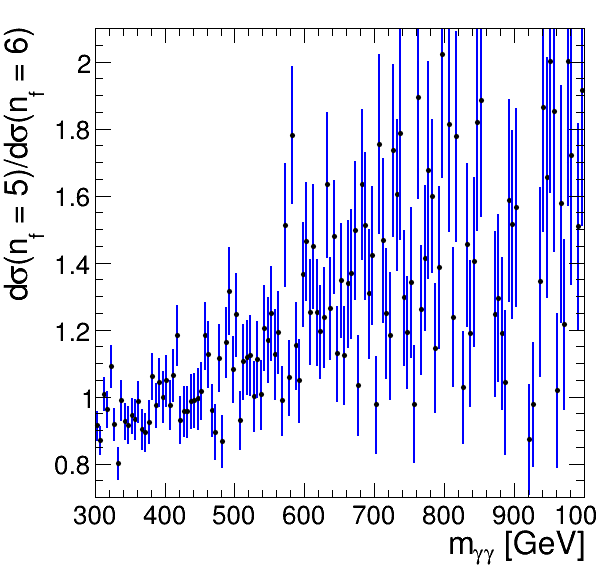

TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors_precgoal_01;1	


Info in <TCanvas::Print>: png file histogram.png has been created


In [86]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_precgoal_01/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()

ROOT.gROOT.SetBatch(True)
# Open the ROOT file
rootFile = ROOT.TFile.Open(filename, "READ")

# Get the histogram
my_histogram = rootFile.Get("gg2gmgm_kfactors_precgoal_01")  

# Create a canvas
#canvas = ROOT.TCanvas("my_canvas", "My Histogram Plot", 800, 600)
c = ROOT.TCanvas()

# Draw the histogram

yaxis = my_histogram.GetYaxis()
yaxis.SetRangeUser(0.7, 2.1)   # y_min, y_max

my_histogram.Draw()
c.Draw()

# Convert to image and display inline
from IPython.display import Image, display
c.Update()
c.SaveAs("histogram.png")   # temporarily save as PNG
display(Image(filename="histogram.png"))

Now we check the same thing for data calculated with tweaks to the itercallmult variable (itercallmult=2)


In [62]:
#Same 6q gg to gamma gamma NLO estimation prescription but for data calculated with itercallmult =2 


base_path = "/Users/jorgehernandez/Desktop/pp-gammagamma" 

gmgm_raw = ["itercallmult2_tst/5q_lo_itercallmult2_tst" , "itercallmult2_tst/5q_nlo_itercallmult2_tst" , "itercallmult2_tst/6q_itercallmult2_tst"]
#gmgm_raw_lo = ["5q_lo_precgoal_01" , "6q_precgoal_01"] 
#gmgm_raw_nlo = ["gg2gam_nlo_5q_sherpa_autoplotHists"] 

variables = ["m34_highMass" , "m(34)" , "pt(3)" , "pt(4)", "y(3)" ,"y(4)" ]

for var in variables: 
    gmgm = [dataset.Dataset.from_directory( name=dir,  var=var , directory= f"{base_path}/{dir}") for dir in gmgm_raw ] 
#    print(f"var is: {var}")
#    print(f"dataset vars: {gmgm[0].var} , {gmgm[1].var } , {gmgm[2].var}  ")
    
    comp_ = compare.Compare(gmgm , name = "gg2gmgm_itercallmult2_tst")
    # scale according to scheme 1, established previouslt in notes and frank petriello correspondence. 
    #comp_.datasets[1] = gg2gam_nlo_5q_sherpa_autoplotHists and comp_.datasets[0] = gg2gam_lo_5q_sherpa_autoplotHists
    comp_.plot(labels=[r"$gg \to \gamma \gamma (LO/n_f=5)$" , r"$gg \to \gamma \gamma (NL0/n_f=5)$" ,  r"$gg \to \gamma \gamma g (LO/n_f=6)$"], logy=True)

    comp_.create_kfactor(num_dataset= comp_.datasets[2], denom_dataset= comp_.datasets[0] , name = "gg2gmgm_kfactors_itercallmult2" , new_y_axis_name=f"d#sigma(n_{{f}} = 5)/d#sigma(n_{{f}} = 6)") # numerator is gg2gam_nlo_5q_sherpa_autoplotHists and denom is gg2gam_lo_5q_sherpa_autoplotHists

    comp_.scale_histogram(comp_.datasets[1], name = "gg2gam_nlo_6q_itercallmult2")
    
#    print(comp_.datasets[3].hist) 
    comp_.datasets[3].save_as_TH1F(f"gg2gmgm_nlo_6q_{var}") 

    comp_.plot(logy= True, output_dir="plots/gg2gmgm_nlo_6q_5q_comparisons_default_itercallmult2", labels = [r" NL0 $gg \to \gamma \gamma$ (5q)" , r" NL0 $gg \to \gamma \gamma$ (6q)" ], sel = [0 ,1 ,0 , 1]) 







Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_itercallmult2' to comparison (4 total).


Info in <TCanvas::Print>: pdf file plots/gg2gmgm_itercallmult2_tst/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_itercallmult2_tst/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_itercallmult2_tst/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_itercallmult2_tst/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_default_itercallmult2/gg2gmgm_itercallmult2_tst/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_default_itercallmult2/gg2gmgm_itercallmult2_tst/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_default_itercallmult2/gg2gmgm_itercallmult2_tst/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_default_itercallmult2/gg2gmgm_itercallmult2_tst/m34_hi

In [76]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()


TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors_itercallmult2;1	


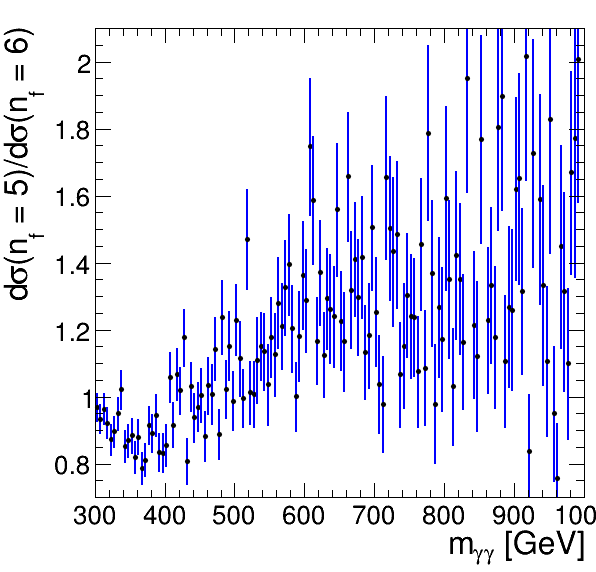

TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors_itercallmult2;1	


Info in <TCanvas::Print>: png file histogram.png has been created


In [85]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_itercallmult2/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()

ROOT.gROOT.SetBatch(True)
# Open the ROOT file
rootFile = ROOT.TFile.Open(filename, "READ")

# Get the histogram
my_histogram = rootFile.Get("gg2gmgm_kfactors_itercallmult2")  

# Create a canvas
#canvas = ROOT.TCanvas("my_canvas", "My Histogram Plot", 800, 600)
c = ROOT.TCanvas()
# Draw the histogram
yaxis = my_histogram.GetYaxis()
yaxis.SetRangeUser(0.7, 2.1)   # y_min, y_max

my_histogram.Draw()
c.Draw()

# Convert to image and display inline
from IPython.display import Image, display
c.Update()
c.SaveAs("histogram.png")   # temporarily save as PNG
display(Image(filename="histogram.png"))

In [68]:
#Same 6q gg to gamma gamma NLO estimation prescription but for data calculated 20 Gev bins and precision goal 0.1 


base_path = "/Users/jorgehernandez/Desktop/pp-gammagamma/gg2gmgm_20GevBin_precGoal01" 

gmgm_raw = ["5q_lo_20GevBins_prec01" , "5q_nlo_20GevBins_prec01" , "6q_lo_20GevBins_prec01"]
gmgm_raw_lo = ["5q_lo_20GevBins_prec01" , "6q_lo_20GevBins_prec01"] 
gmgm_raw_nlo = ["5q_nlo_20GevBins_prec01"] 

variables = ["m34_highMass" , "m(34)" , "pt(3)" , "pt(4)", "y(3)" ,"y(4)" ]

for var in variables: 
    gmgm = [dataset.Dataset.from_directory( name=dir,  var=var , directory= f"{base_path}/{dir}") for dir in gmgm_raw ] 
#    print(f"var is: {var}")
#    print(f"dataset vars: {gmgm[0].var} , {gmgm[1].var } , {gmgm[2].var}  ")
    
    comp_ = compare.Compare(gmgm , name = "gg2gmgm_20GevBins_precgoal_01")
    # scale according to scheme 1, established previouslt in notes and frank petriello correspondence. 
    #comp_.datasets[1] = gg2gam_nlo_5q_sherpa_autoplotHists and comp_.datasets[0] = gg2gam_lo_5q_sherpa_autoplotHists
    comp_.plot(labels=[r"$gg \to \gamma \gamma (LO/n_f=5)$" , r"$gg \to \gamma \gamma (NL0/n_f=5)$" ,  r"$gg \to \gamma \gamma (LO/n_f=6)$"], logy=True)

    comp_.create_kfactor(num_dataset= comp_.datasets[2], denom_dataset= comp_.datasets[0] , name = "gg2gmgm_kfactors_20GevBins_precgoal_01" , new_y_axis_name=f"d#sigma(n_{{f}} = 5)/d#sigma(n_{{f}} = 6)") # numerator is gg2gam_nlo_5q_sherpa_autoplotHists and denom is gg2gam_lo_5q_sherpa_autoplotHists

    comp_.scale_histogram(comp_.datasets[1], name = "gg2gam_nlo_6q_precgoal_01_20GevBins")
    
#    print(comp_.datasets[3].hist) 
    comp_.datasets[3].save_as_TH1F(f"gg2gmgm_nlo_6q_20GevBins_precgoal_01_{var}") 

    comp_.plot(logy= True, output_dir="plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01", labels = [r" NL0 $gg \to \gamma \gamma$ (5q)" , r" NL0 $gg \to \gamma \gamma$ (6q)" ], sel = [0 ,1 ,0 , 1]) 






Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).
Added dataset 'gg2gam_nlo_6q_precgoal_01_20GevBins' to comparison (4 total).


Info in <TCanvas::Print>: pdf file plots/gg2gmgm_20GevBins_precgoal_01/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_20GevBins_precgoal_01/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_20GevBins_precgoal_01/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_20GevBins_precgoal_01/m34_highMass_log.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_20GevBins_precgoal_01/m34_highMass.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_20GevBins_precgoal_01/m34_highMass.png has been created
Info in <TCanvas::Print>: pdf file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_20GevBins_precgoal_01/m34_highMass_log.pdf has been created
Info in <TCanvas::Print>: png file plots/gg2gmgm_nlo_6q_5q_comparisons_precgoal_01/gg2gmgm_20GevBins_precgoal_01/m34_highMass_l

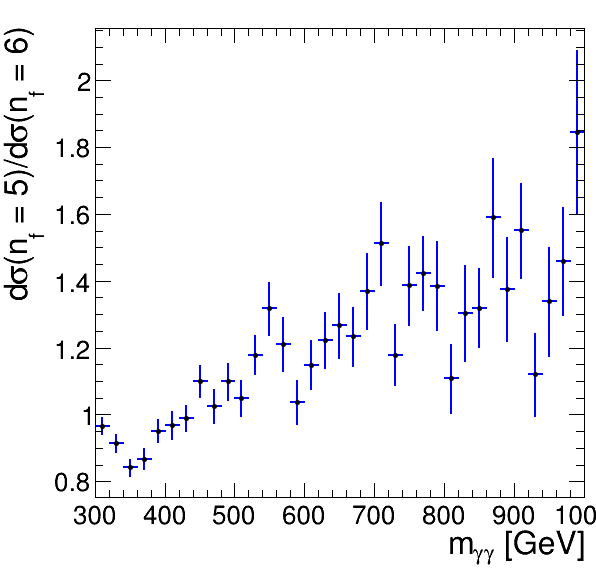

TFile**		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_20GevBins_precgoal_01/kfactor_m34_highMass.root	
 TFile*		/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_20GevBins_precgoal_01/kfactor_m34_highMass.root	
  KEY: TH1F	gg2gmgm_kfactors_20GevBins_precgoal_01;1	


Info in <TCanvas::Print>: png file histogram.png has been created


In [71]:
filename = "/Users/jorgehernandez/Desktop/pp-gammagamma/mcfm-plotter/k_factors/gg2gmgm_kfactors_20GevBins_precgoal_01/kfactor_m34_highMass.root" 

rootFile = ROOT.TFile.Open(filename)
rootFile.ls()

ROOT.gROOT.SetBatch(True)
# Open the ROOT file
rootFile = ROOT.TFile.Open(filename, "READ")

# Get the histogram
my_histogram = rootFile.Get("gg2gmgm_kfactors_20GevBins_precgoal_01")  

# Create a canvas
#canvas = ROOT.TCanvas("my_canvas", "My Histogram Plot", 800, 600)
c = ROOT.TCanvas()

# Draw the histogram
my_histogram.Draw()
c.Draw()

# Convert to image and display inline
from IPython.display import Image, display
c.Update()
c.SaveAs("histogram.png")   # temporarily save as PNG
display(Image(filename="histogram.png"))